<a href="https://colab.research.google.com/github/anita03012005/weatherwise-jiasyuan/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [1]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast
    """
    pass

In [2]:
def get_weather_data(location, forecast_days=5, timeout=10):
    import requests
    if not location or not isinstance(location, str):
        print("Error: Invalid location")
        return None

    if not 1 <= forecast_days <= 5:
        print("Error: forecast_days must be between 1 and 5")
        forecast_days = min(max(1, forecast_days), 5)

    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()

        data = response.json()
        result = {
                "location": location.replace("+", " "),
                "current": {
                    "temperature": {
                        "current": int(data["current_condition"][0]["temp_C"]),
                        "feels_like": int(data["current_condition"][0]["FeelsLikeC"])
                    },
                    "condition": data["current_condition"][0]["weatherDesc"][0]["value"],
                    "humidity": int(data["current_condition"][0]["humidity"]),
                    "wind": {
                        "speed": int(data["current_condition"][0]["windspeedKmph"]),
                        "direction": data["current_condition"][0]["winddir16Point"]
                    },
                    "precipitation": float(data["current_condition"][0]["precipMM"])
                },
                "forecast": []
        }

        for i in range(min(forecast_days, len(data["weather"]))):
            day = data["weather"][i]
            forecast_day = {
                    "date": day["date"],
                    "max_temp": int(day["maxtempC"]),
                    "min_temp": int(day["mintempC"]),
                    "condition": day["hourly"][4]["weatherDesc"][0]["value"],  # Midday condition
                    "precipitation": {
                        "chance": int(day["hourly"][4]["chanceofrain"]),
                        "amount": float(day["hourly"][4]["precipMM"])
                    },
                    "wind": {
                        "speed": int(day["hourly"][4]["windspeedKmph"]),
                        "direction": day["hourly"][4]["winddir16Point"]
                    }
                }
            result["forecast"].append(forecast_day)

        return result
    except requests.exceptions.RequestException as e:
        print(f"Error retrieving weather data: {e}")
        return None
    except (KeyError, ValueError, TypeError) as e:
        print(f"Error processing weather data: {e}")
        return Non

# Ask user to input ramdom city
city = input("🌏Enter a city name:")
while True:
    days = int(input("📅 How many forecast days? (1–5): "))
    if 1 <= days <=5:
        break
    else:
        print("⚠️Please enter a number between 1 and 5")

data = get_weather_data(city,days)
if data:
    print(f"📍 Location: {data['location']}")
    print(f"🌡️ Temperature: {data['current']['temperature']['current']}°C (Feels like {data['current']['temperature']['feels_like']}°C)")
    print(f"☁️ Condition: {data['current']['condition']}")
    print(f"💧 Humidity: {data['current']['humidity']}%")
    print(f"💨 Wind: {data['current']['wind']['speed']} km/h {data['current']['wind']['direction']}")
else:
    print("❌ Failed to retrieve weather data.")

🌏Enter a city name:perth 
📅 How many forecast days? (1–5): 7
⚠️Please enter a number between 1 and 5
📅 How many forecast days? (1–5): 5
📍 Location: perth 
🌡️ Temperature: 11°C (Feels like 11°C)
☁️ Condition: Clear
💧 Humidity: 94%
💨 Wind: 7 km/h ESE


## 📊 Visualisation Functions

In [3]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

Enter a city:sydney
Location: sydney
Now: Sunny, 26°C (feels 27°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-17,31,17,Thundery outbreaks in nearby,"{'chance': 0, 'amount': 0.0}","{'speed': 9, 'direction': 'WNW'}"
1,2025-10-18,20,17,Partly Cloudy,"{'chance': 0, 'amount': 0.0}","{'speed': 17, 'direction': 'ESE'}"
2,2025-10-19,22,16,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 27, 'direction': 'NE'}"


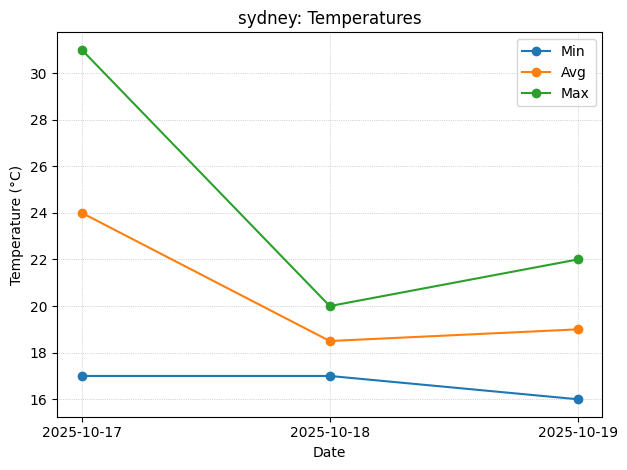

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

def create_temperature_visualisation(weather_data:dict,output_type:str = 'display'):
    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # create the figure for plotting
    fig = plt.figure()
    x = df["date"].astype(str)
    df["avg_temp"] = (df["min_temp"] + df["max_temp"]) / 2

    # plot minimum and maximum temperature line chart
    plt.plot(x, df["min_temp"], marker="o", label="Min")
    plt.plot(x, df["avg_temp"], marker="o", label="Avg")
    plt.plot(x, df["max_temp"], marker="o", label="Max")

    # customize chart label,title and layout
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title(f"{weather_data.get('location', 'Location')}: Temperatures")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.5)
    plt.tight_layout()

    if output_type == "figure":
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_temperature_visualisation(data)

except Exception as e:
    print("Error:", e)



Enter a city:perth 
Location: perth
Now: Clear, 11°C (feels 11°C)


,date,max_temp,min_temp,condition,precipitation,wind
0,2025-10-17,26,15,Sunny,"{'chance': 0, 'amount': 0.0}","{'speed': 16, 'direction': 'NW'}"
1,2025-10-18,19,16,Patchy rain nearby,"{'chance': 100, 'amount': 0.1}","{'speed': 26, 'direction': 'W'}"
2,2025-10-19,19,13,Light rain shower,"{'chance': 100, 'amount': 0.3}","{'speed': 27, 'direction': 'WNW'}"


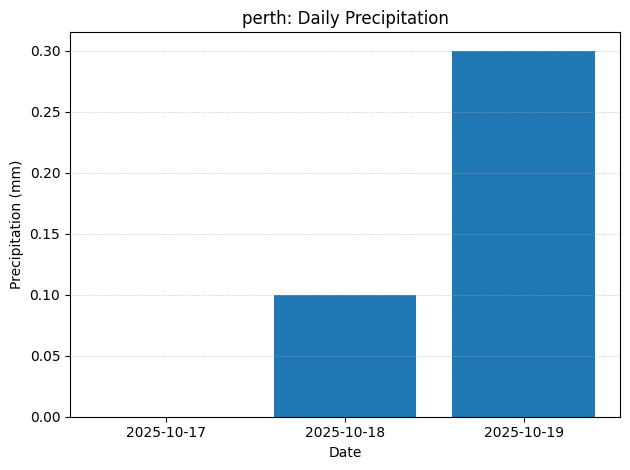

In [5]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data: dict, output_type: str = 'display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """

    # create a Dateframe from the weather_data
    df = forecast_to_df(weather_data)
    if df.empty:
        print("No forecast data to plot.")
        return None

    # identify precipitation column
    if 'precip_mm' in df.columns:
        y = pd.to_numeric(df['precip_mm'], errors='coerce').fillna(0.0)
    elif 'precipitation' in df.columns:
        y = df['precipitation'].apply(
            lambda d: float(d.get('amount', 0)) if isinstance(d, dict) else 0.0
        )
    else:
        print("No precipitation column found in DataFrame.")
        return None

    x = df['date'].astype(str)

    # plot the precipitation figure
    fig = plt.figure()
    plt.bar(x, y)
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title(f"{weather_data.get('location','Location')}: Daily Precipitation")
    plt.grid(True, axis='y', linestyle=':', linewidth=0.5)
    plt.tight_layout()

    # display the figure
    if output_type == 'figure':
        return fig
    plt.show()
    return None

# Ask user to input a city
city = input ("Enter a city:").strip()

try:
    data = get_weather_data(city, forecast_days=5)
    if not data:
        print("Failed to fetch data. Try another city.")
    else:
        print(f"Location: {data['location']}")
        cur = data["current"]
        print(f"Now: {cur['condition']}, {cur['temperature']['current']}°C (feels {cur['temperature']['feels_like']}°C)")
        df = forecast_to_df(data)
        display(df)  # shows tidy table
        # optional quick charts:
        create_precipitation_visualisation(data)

except Exception as e:
    print("Error:", e)



In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd

def forecast_to_df(weather_data):
    """
    Convert forecast data from dictionary to pandas DataFrame.

    Args:
        weather_data (dict): Weather data including forecast

    Returns:
        pd.DataFrame: DataFrame containing forecast data
    """
    if weather_data and "forecast" in weather_data:
        return pd.DataFrame(weather_data["forecast"])
    return pd.DataFrame()

## 🤖 Natural Language Processing

In [6]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.